# Baseball Case Study


Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory Data Analysis

In [3]:
#checking the data dimensions
df.shape

(30, 17)

In [4]:
#checking the columns in the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#checking the datatypes of each column
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

As we can see all the columns in the dataset have only numeric values



In [6]:
#checking the null values in each column of the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

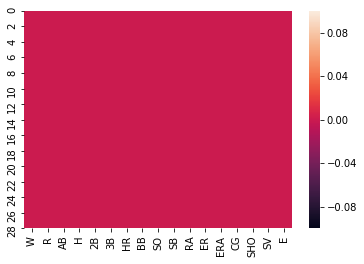

In [7]:
sns.heatmap(df.isnull())

As we can see through the above 2 observations there are no null values present in the dataset



In [8]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
#checking the information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Data Visualization

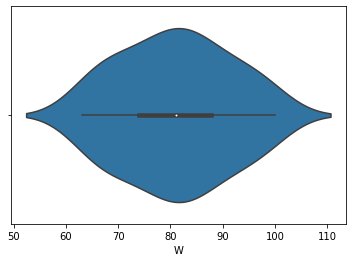

In [10]:
sns.violinplot(x= "W", data=df)
plt.show()

Through the above graph we can observe that majority of the teams have no of wins in the range of 65 to 100.



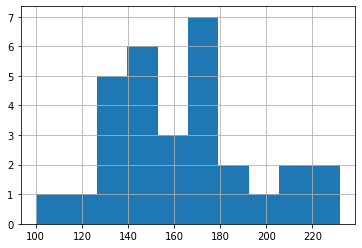

In [11]:
df.HR.hist()

As we can see through the above graph the runs scored by home runs by the teams are majority lie in the range of 127 to 180.



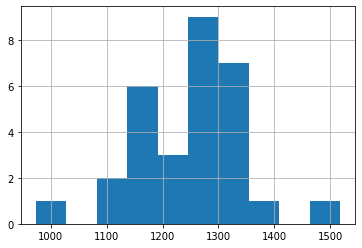

In [12]:
df.SO.hist()

Through the above graph we can see the majority of players that strike out in a team in this season(2014) are lie in the range of 1100 to 1350.



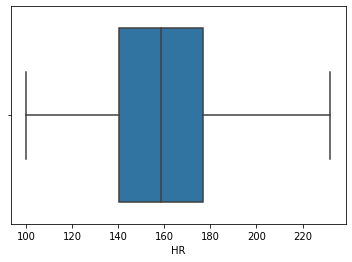

In [13]:
sns.boxplot(x=df.HR)

We Can see from the above graph that the minimum 100 Home runs is scored by a team and maximum 230 Home Runs are scored by a team in this season(2014).

the range in which most of the teams scored Home Runs is between 140 to 178.

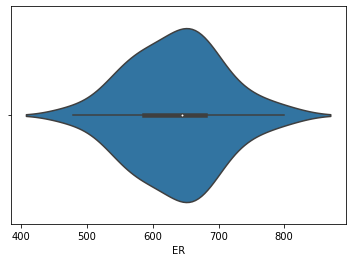

In [14]:
sns.violinplot(x= "ER", data=df)
plt.show()

We can see through above graph that majority of the team scored 550 to 750 runs.



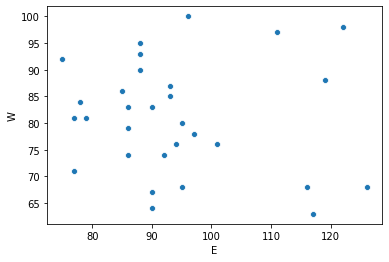

In [15]:
sns.scatterplot(data=df,x='E',y='W')

As we can see through the above graph that as the errors are increasing, the number of wins are becoming less.



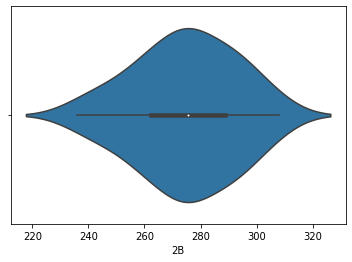

In [16]:
sns.violinplot(x= "2B", data=df)
plt.show()

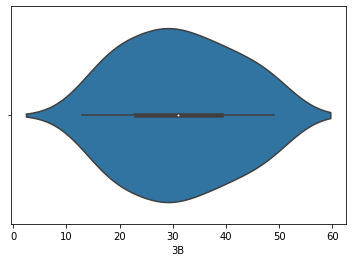

In [17]:
sns.violinplot(x= "3B", data=df)
plt.show()

Through the above 2 graphs, we can observe that Majority of the times the players reach the Second base as compare to the third base.



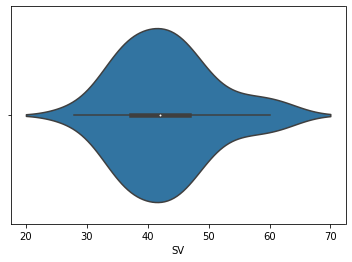

In [18]:
sns.violinplot(x= "SV", data=df)
plt.show()

Through the above graph we can see that between 30 to 55 times the players are saved in the 2014 season.



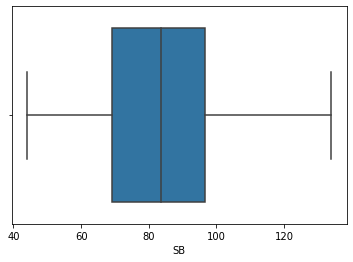

In [19]:
sns.boxplot(x=df.SB)

Through the above graph , we can see that 70 to 95 times the bases were stolen by the batter and the pitcher was not able to out that batter.



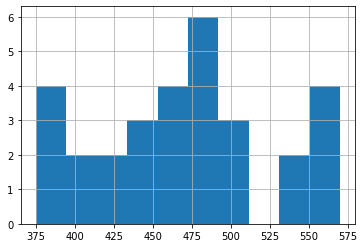

In [20]:
df.BB.hist()

From the above graph we can see that the batter is getting the walks by the umpire in the range of 375 to 570.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000181A8ED8688>,
      dtype=object)

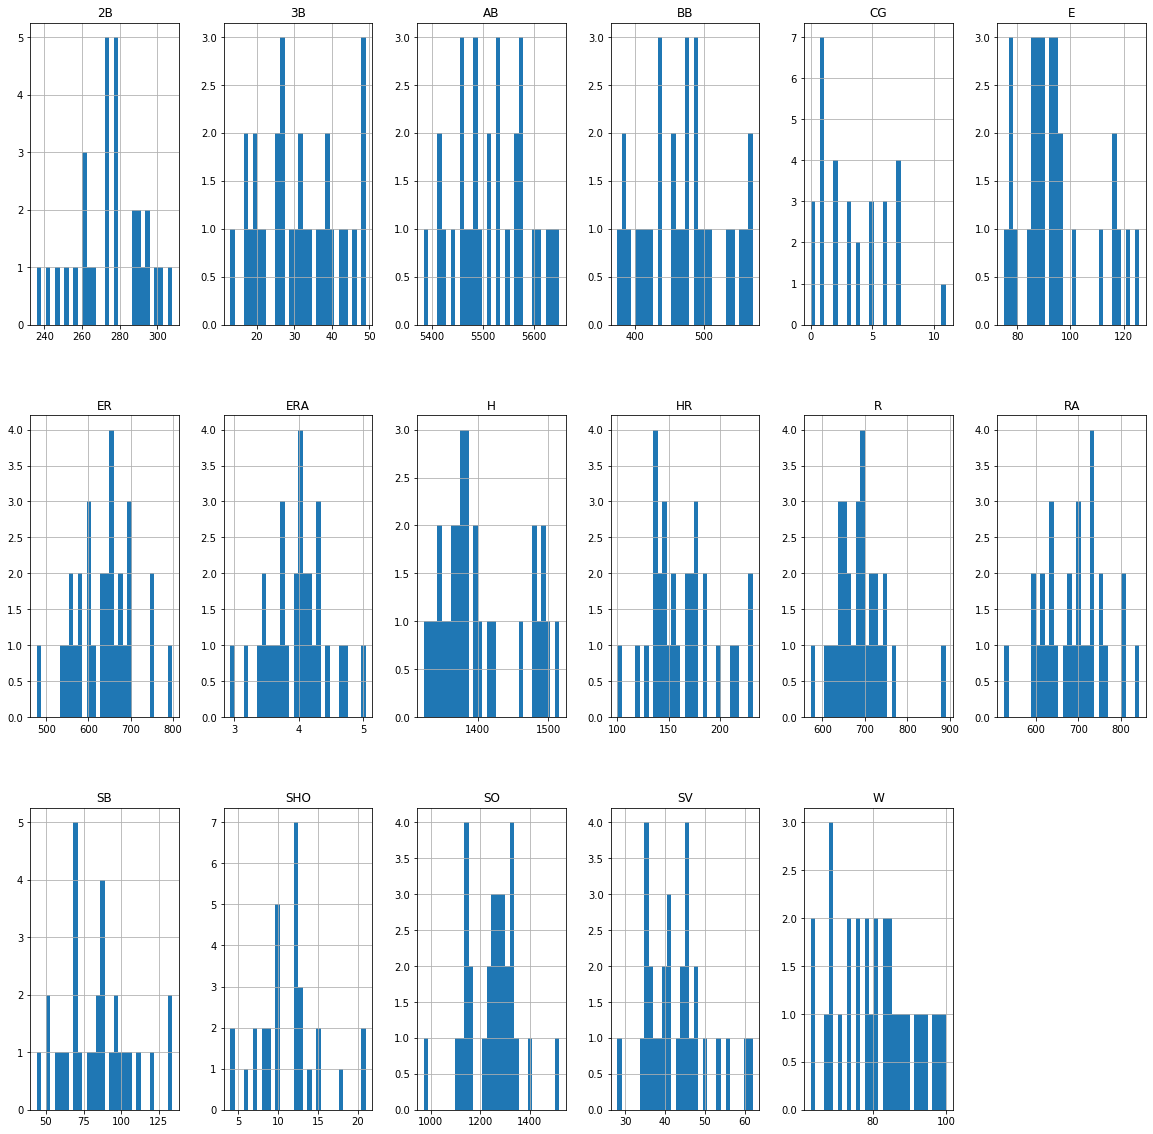

In [21]:
# Histogram to see the data distribution of all the columns'
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

Through the above graphs we can see that data is highly distributed in almost all the columns.



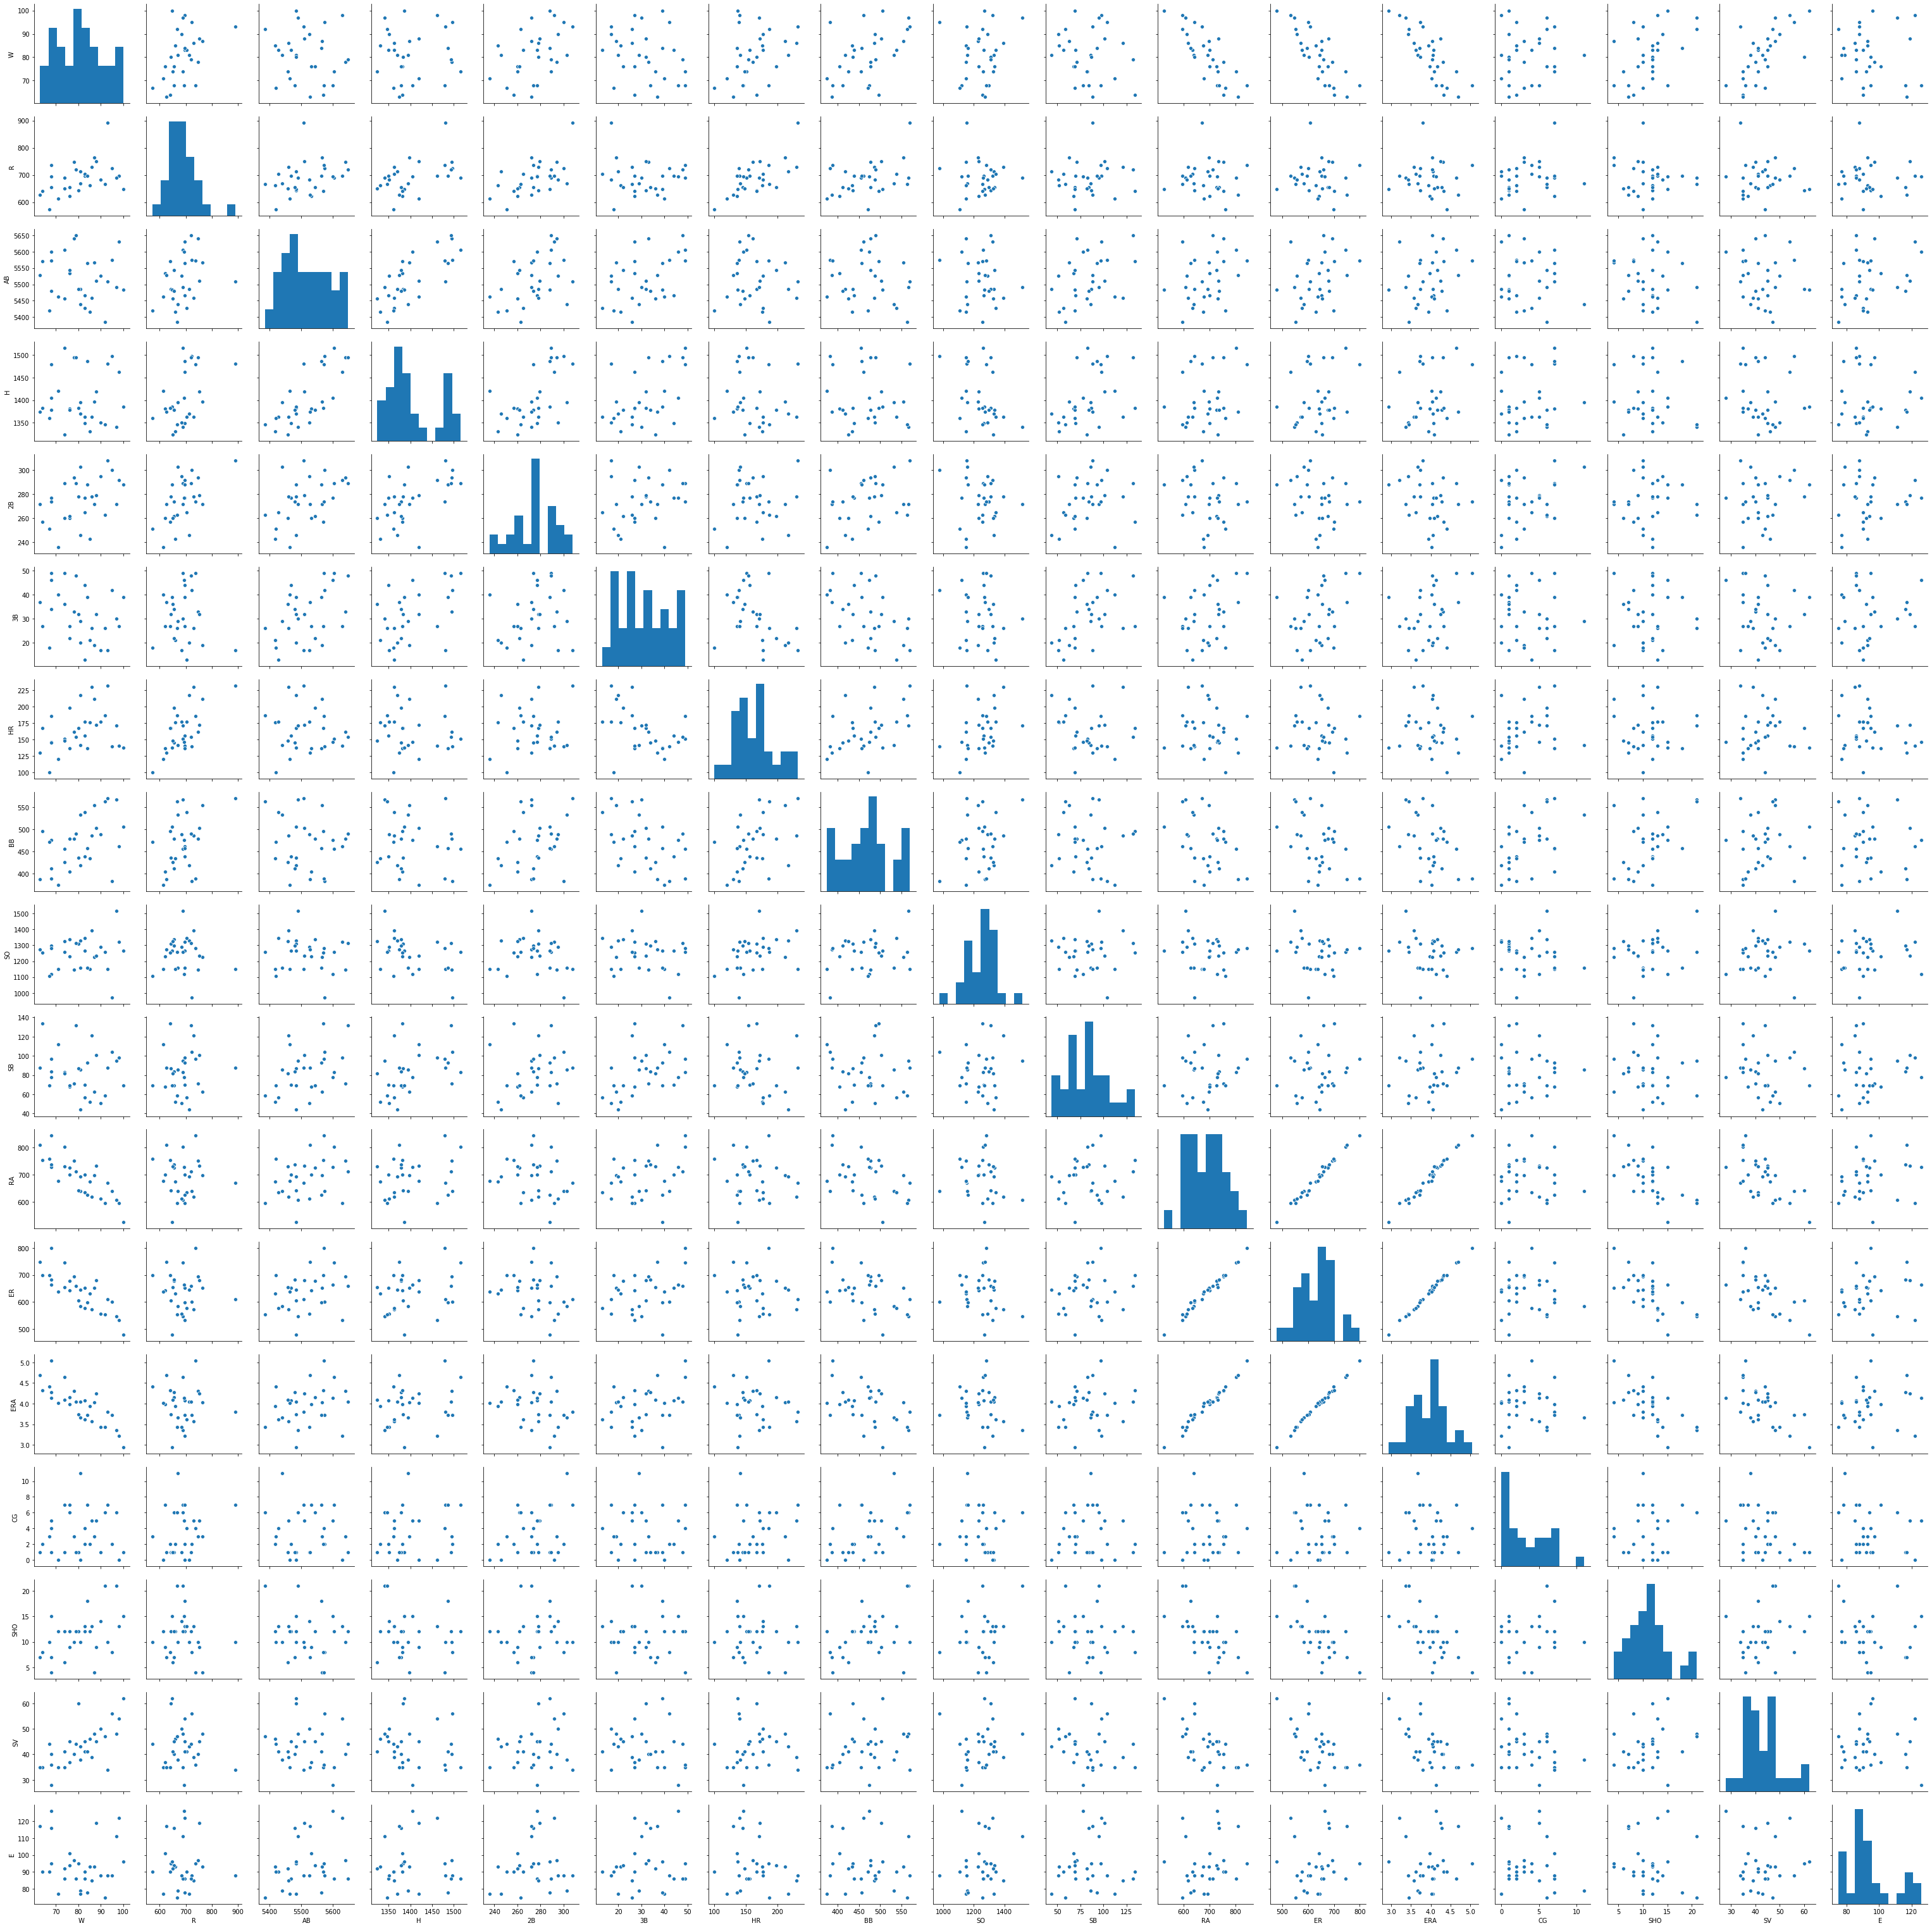

In [22]:
sns.pairplot(df)

In [23]:
df.nunique() #Checking for unique elements in each of the columns

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

This is a Regression Problem since the Target variable / Label column ("W") has Continuous type of Data.


Interpreting Relationship between Dependent and Independent Variables

Analyzing the Target Variable

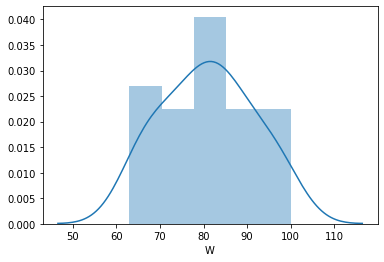

In [24]:
sns.distplot(df.W)

In [25]:
df.W.skew()

0.047088688953686085

From the graph above it is observed that the W data forms a continuous Normal distribution with mean of 80.966.



Analyzing the Feature Columns

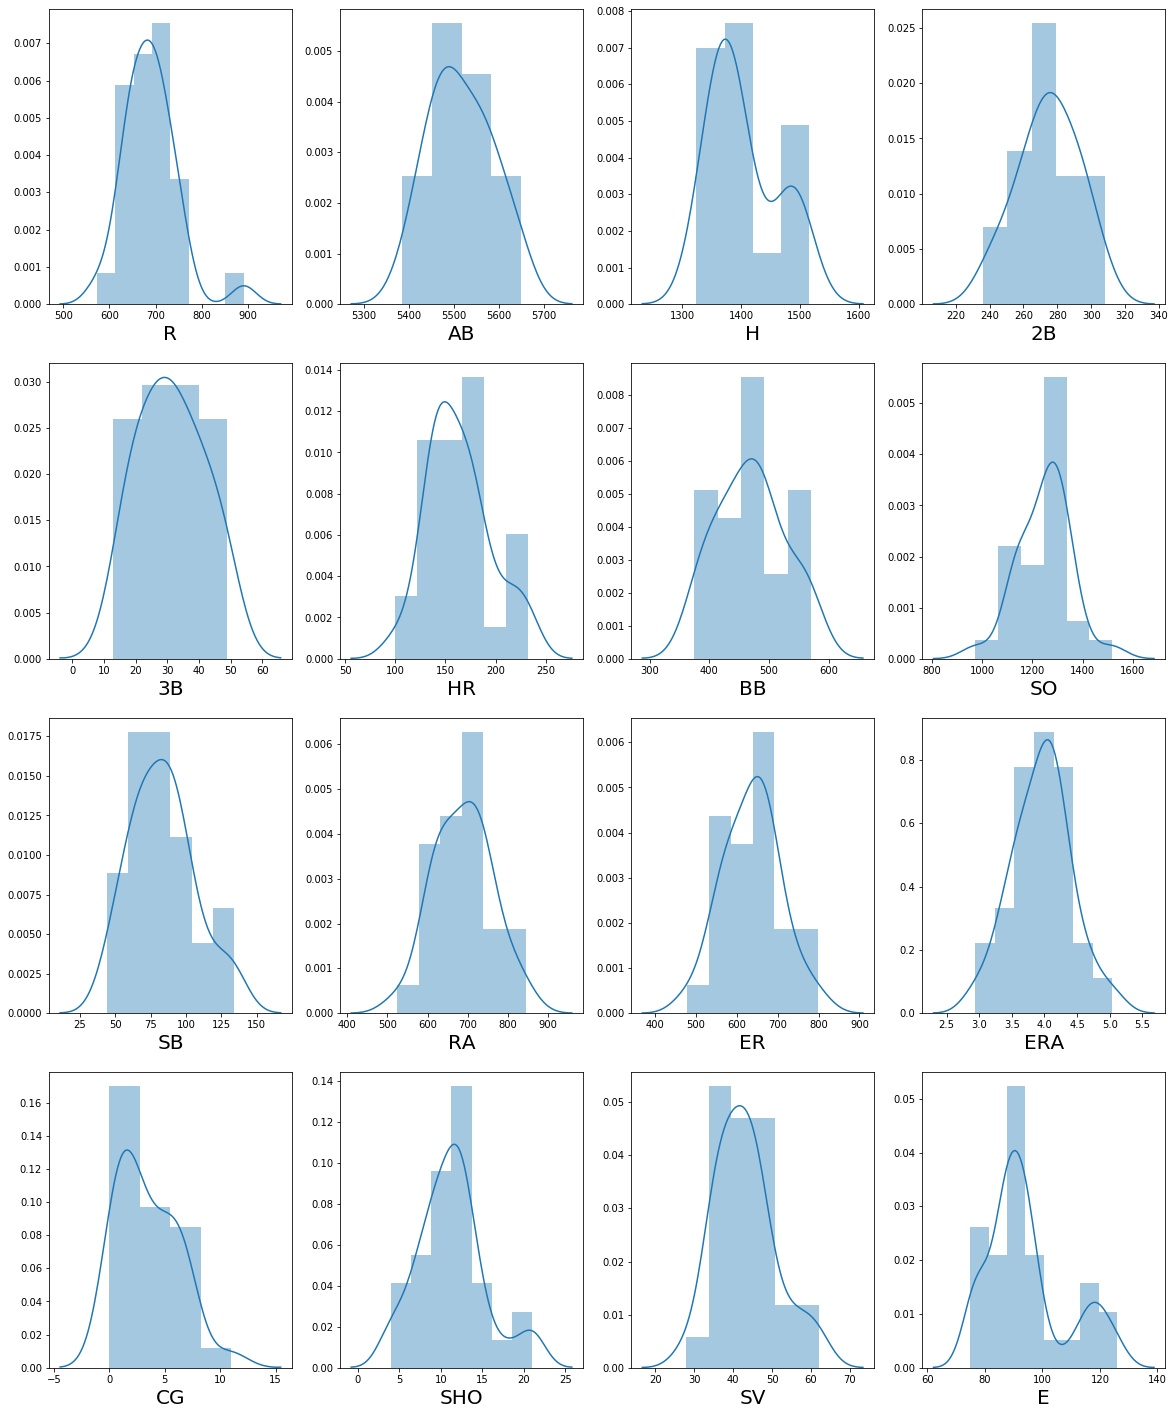

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

It can be observed from above graphs that data is mostly normally distributed.

Data in columns like R, CG, E, SV,H are skewed.

In [27]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Interpreting Relationship between Dependent and Independent Variables

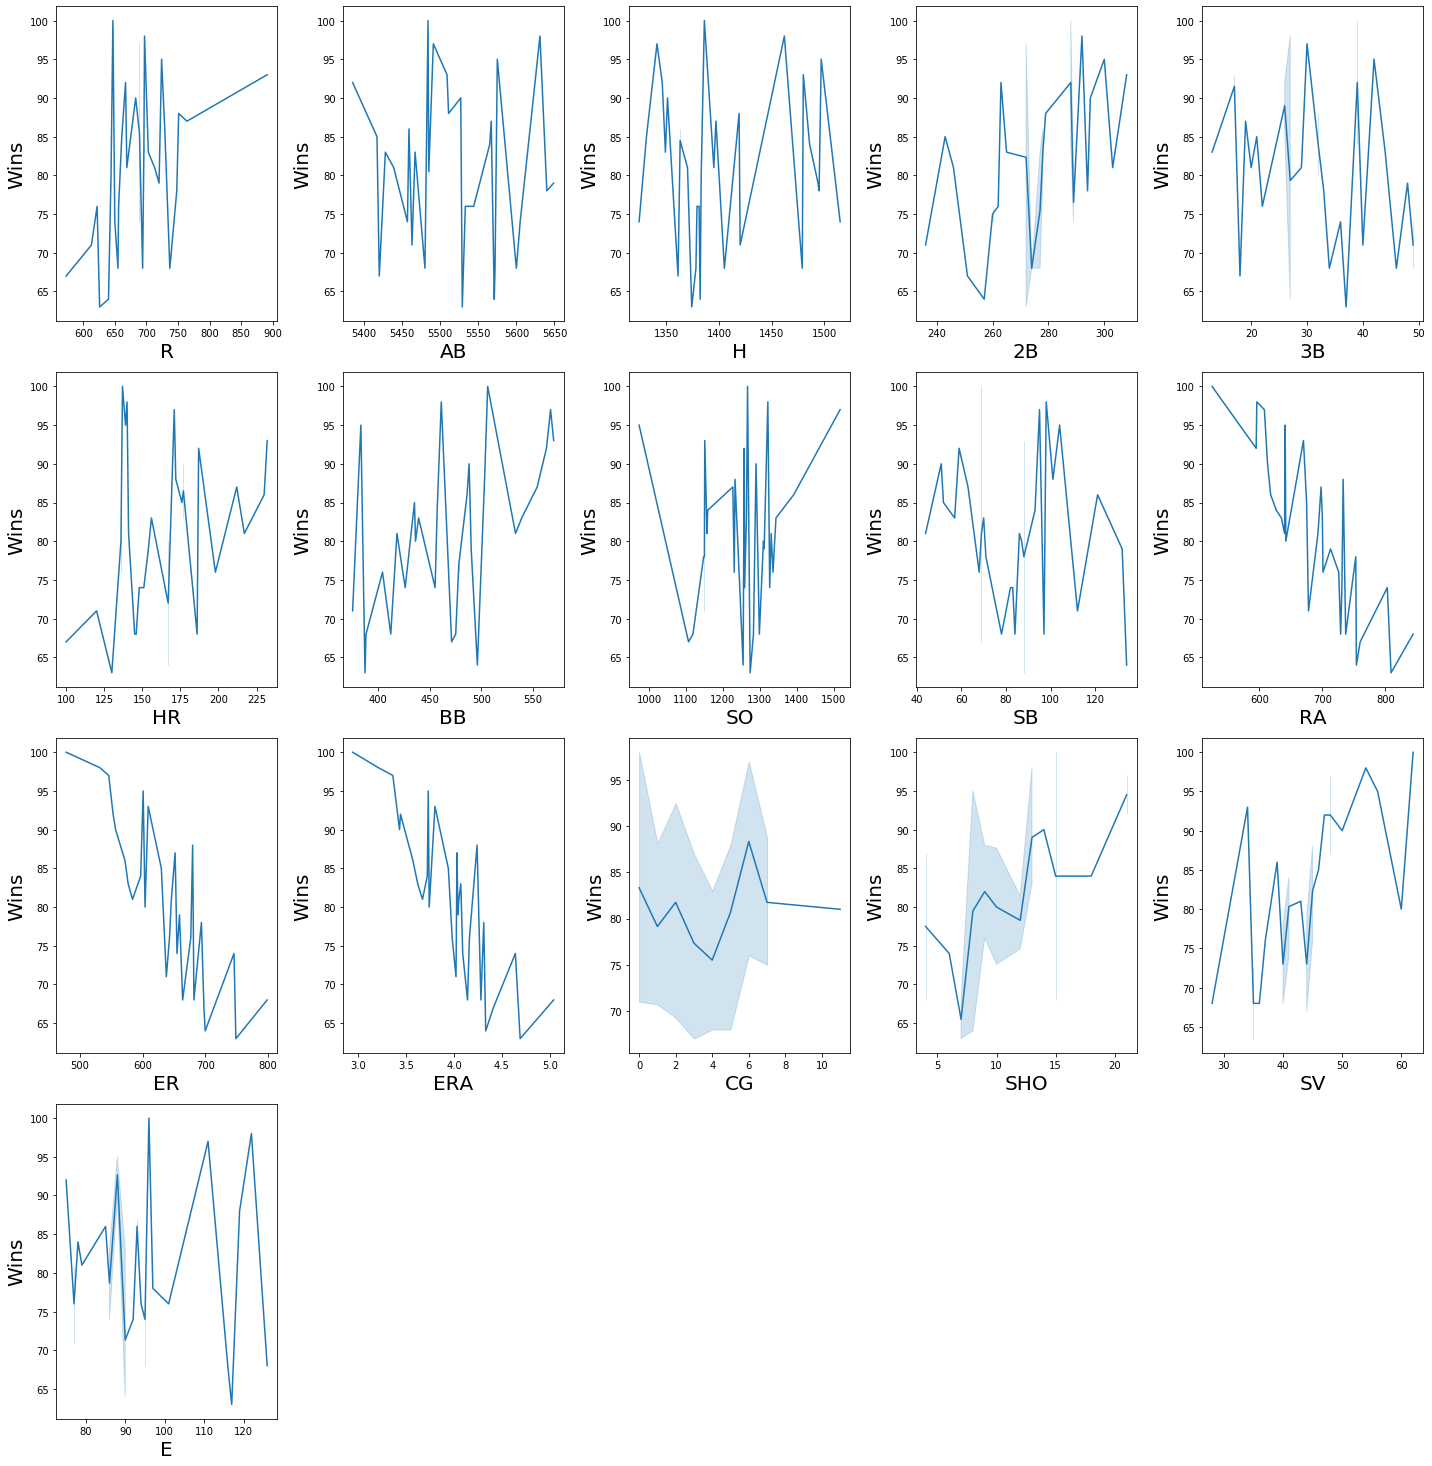

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X  = df.drop(columns=['W'])
y = df['W']
for col in X:
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.lineplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it can be observed that Features like R,2B,HR,BB,SV,SHO have a positive linear relationship with Win. While RA,ER,ERA have a negative linear relationship with W.

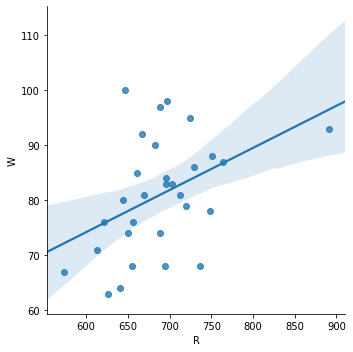

In [29]:
sns.lmplot(x="R", y="W", data=df)

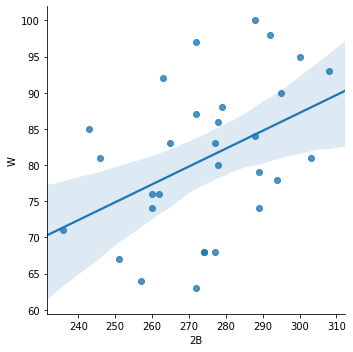

In [30]:
sns.lmplot(x="2B", y="W", data=df)

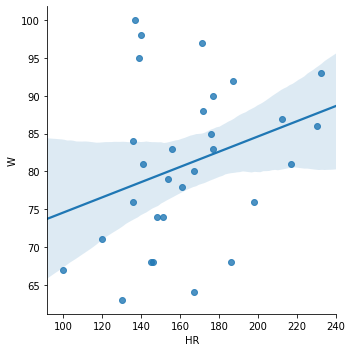

In [31]:
sns.lmplot(x="HR", y="W", data=df)

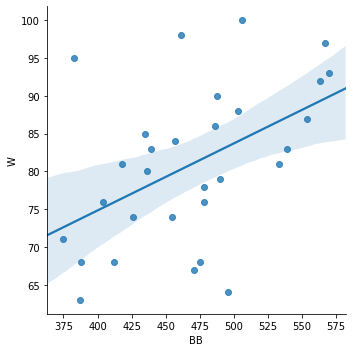

In [32]:
sns.lmplot(x="BB", y="W", data=df)

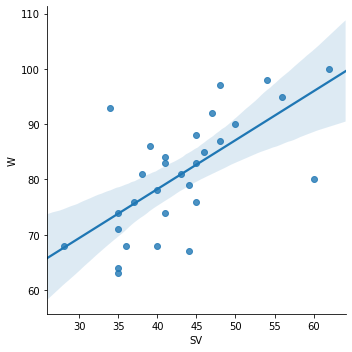

In [33]:
sns.lmplot(x="SV", y="W", data=df)

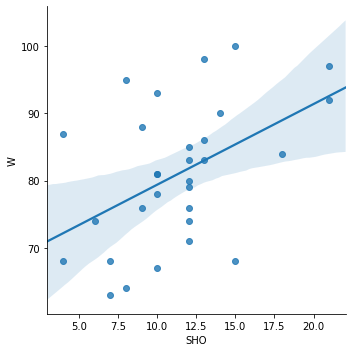

In [34]:
sns.lmplot(x="SHO", y="W", data=df)

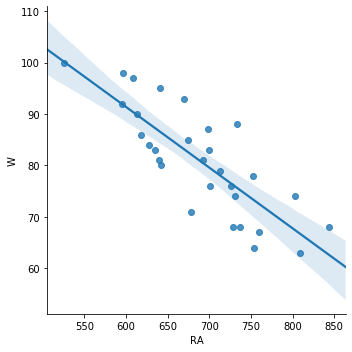

In [35]:
sns.lmplot(x="RA", y="W", data=df)

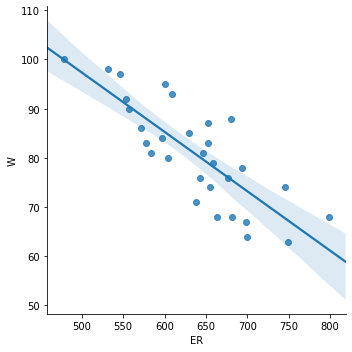

In [36]:
sns.lmplot(x="ER", y="W", data=df)

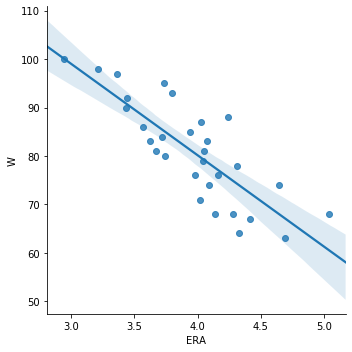

In [37]:
sns.lmplot(x="ERA", y="W", data=df)

# Checking for Outliers in Features.

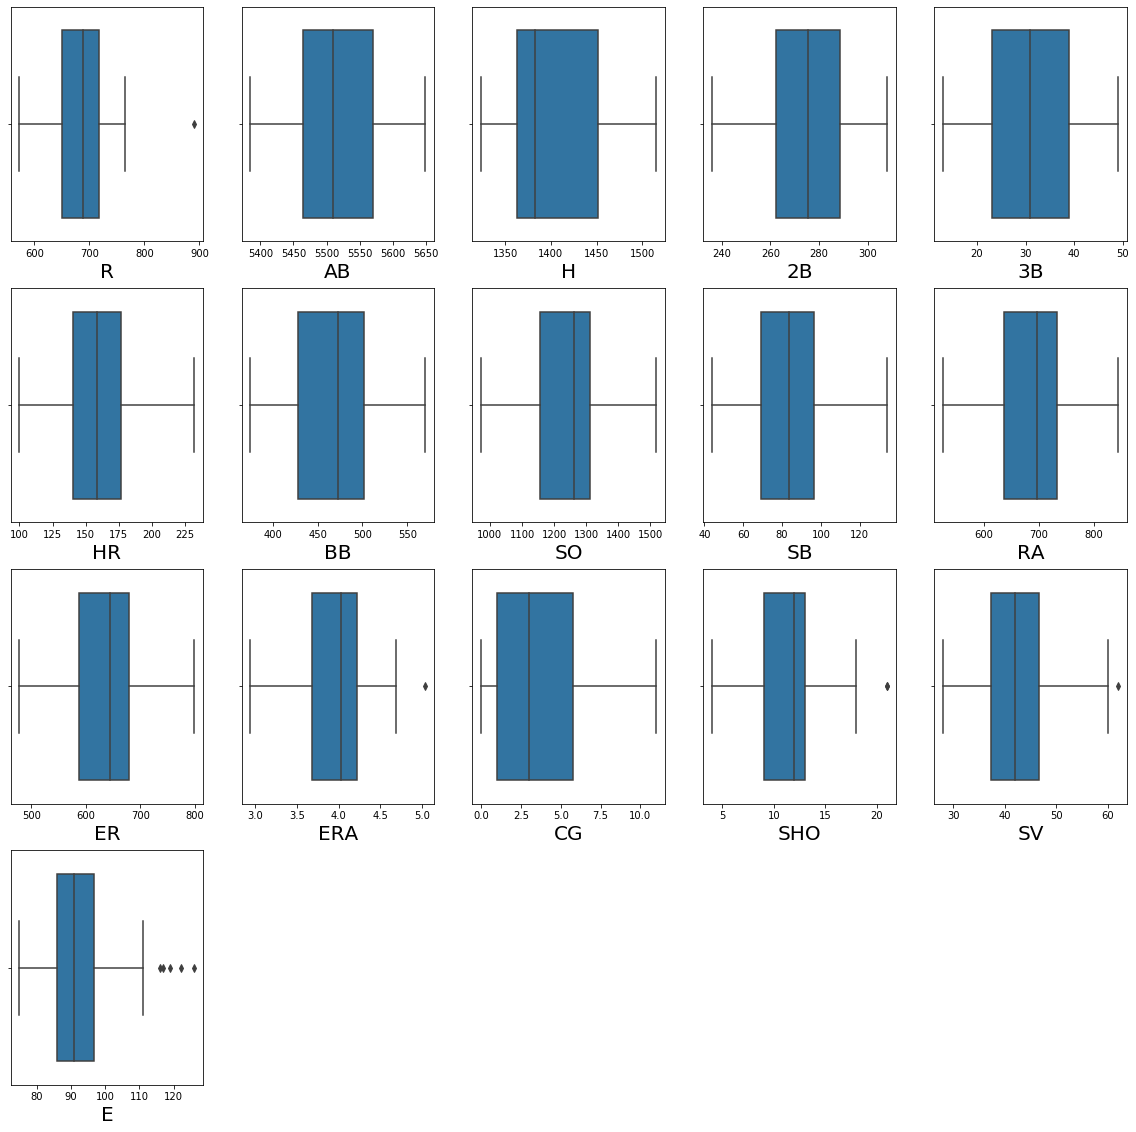

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['W'],axis=1):
    if plotnum<=16:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Columns like R, SHO, SV, ERA and E have outliers present.

# Removing Outliers

Removing Outliers using Z score Method

In [39]:
df2 =df.drop(columns = ['W'],axis=1).copy() #making a copy of all Feature columns.

In [40]:
df2

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [41]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [42]:
df3.shape

(29, 16)

In [43]:
df2.shape

(30, 16)

# Data loss %:

In [44]:
loss=(30-29)/30 * 100
loss

3.3333333333333335

3.33% Data loss is within acceptable range

# Using IQR Method

In [45]:
df4 =df.drop(columns = ['W',],axis=1).copy() #making a copy of all feature columns.

In [46]:
indxdrop = np.array([])
for colm in df4:
    q1 = df4[colm].quantile(0.25)
    q3 = df4[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df4[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array

In [47]:
indxdrop

array([ 5., 29., 17., 25., 15., 10., 14., 16., 18., 24.])

In [48]:
df4 = df4.drop(indxdrop)

In [49]:
df4.shape

(20, 16)

In [50]:
#Data loss %:
loss=(30-20)/30 * 100
loss

33.33333333333333

33.33% Data loss is not within acceptable range

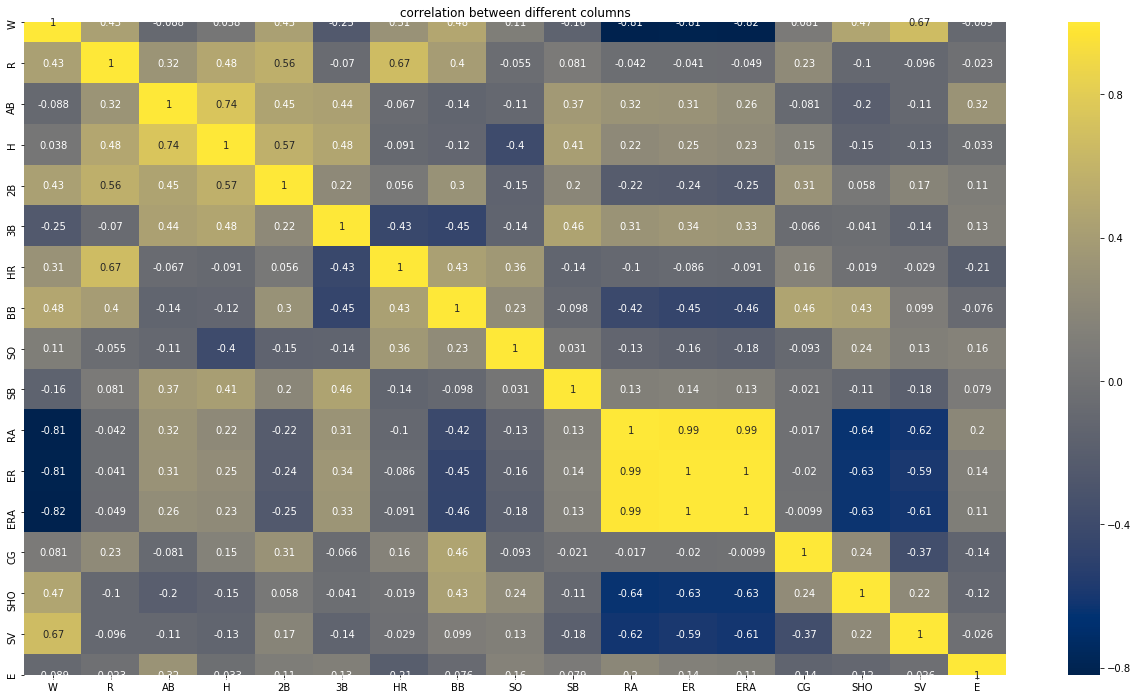

In [51]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

Through the above correlation heatmap following are the findings:-

Runs allowed, Earned runs, Earned runs average and saves are the most positive correlated columns with the wins columns.

Error are the least correlated column with the wins column, as if errors are increasing the no of wins will be decreased.

We can observe that all the columns which have runs in it are moderately positive correlated to the wins column as runs help the team to win the match.

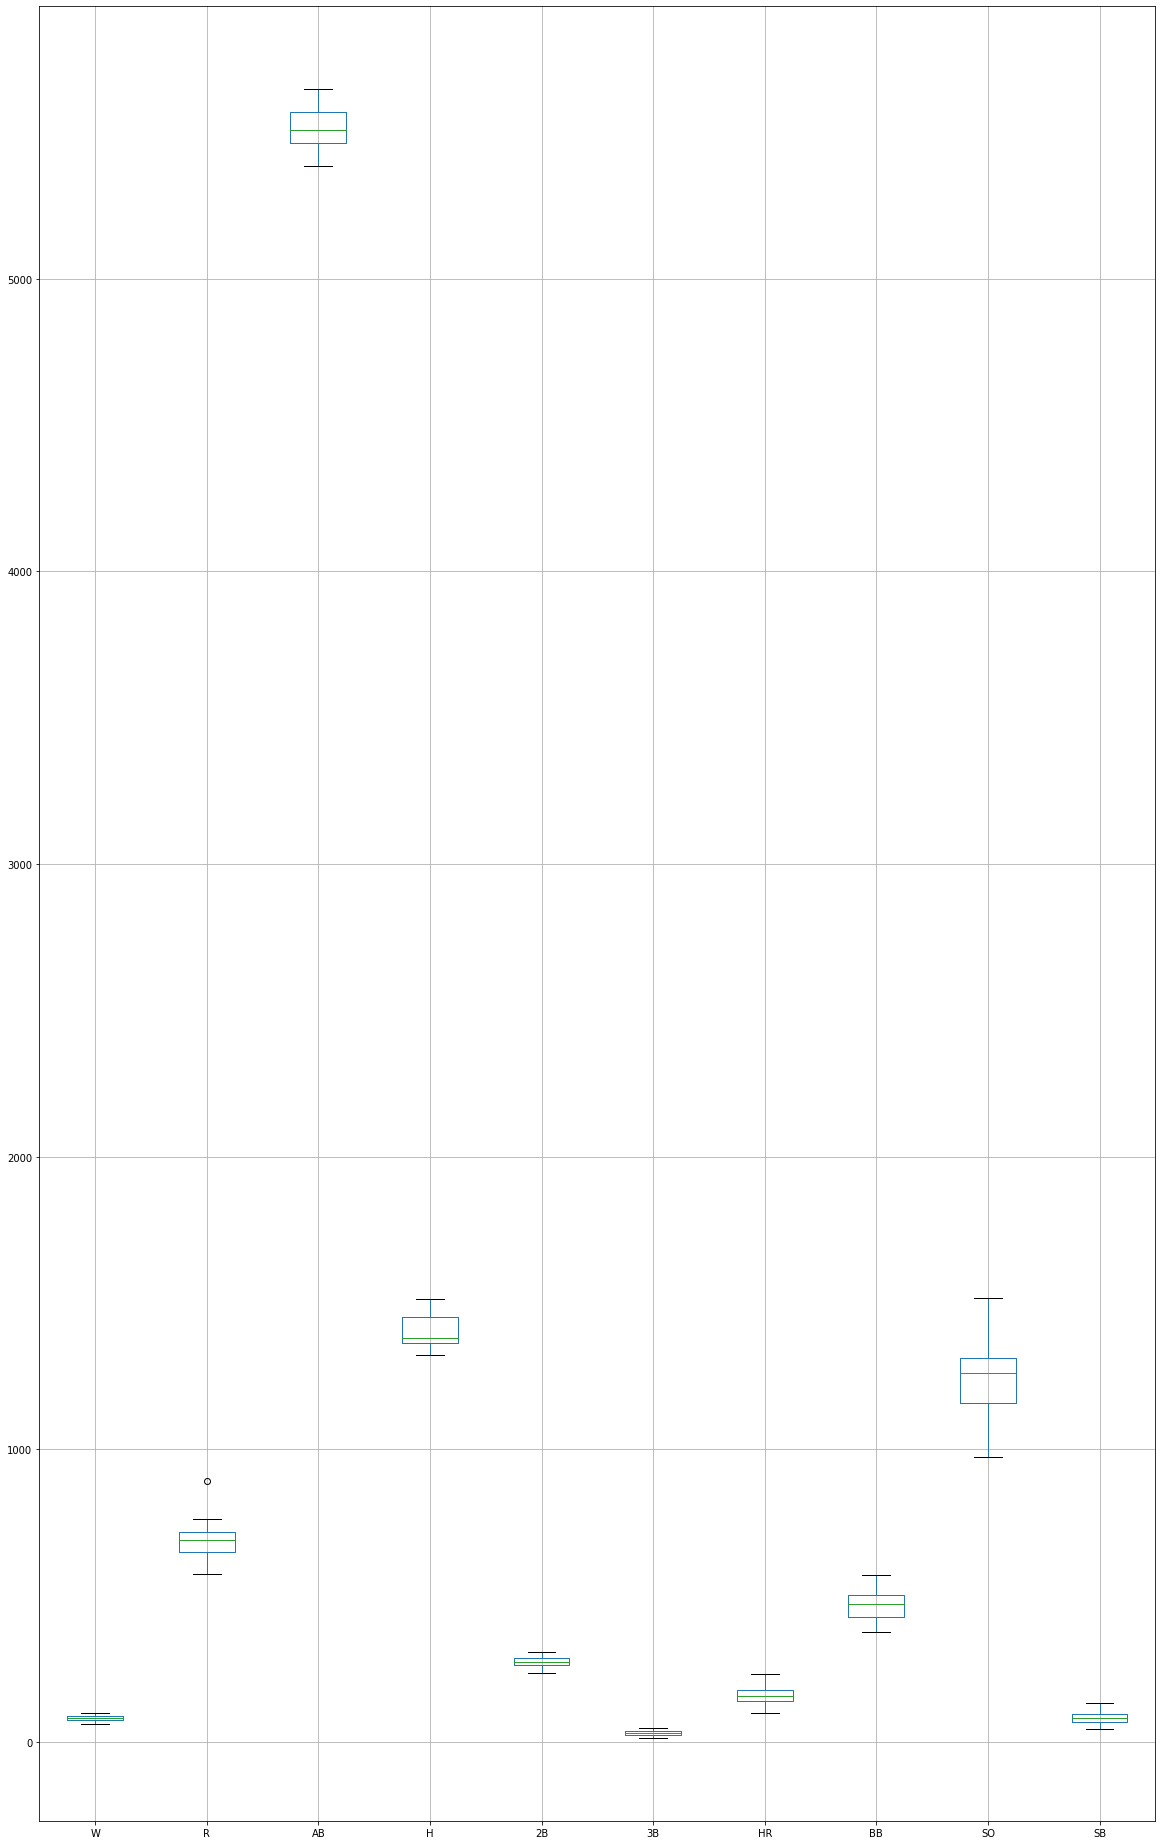

In [52]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

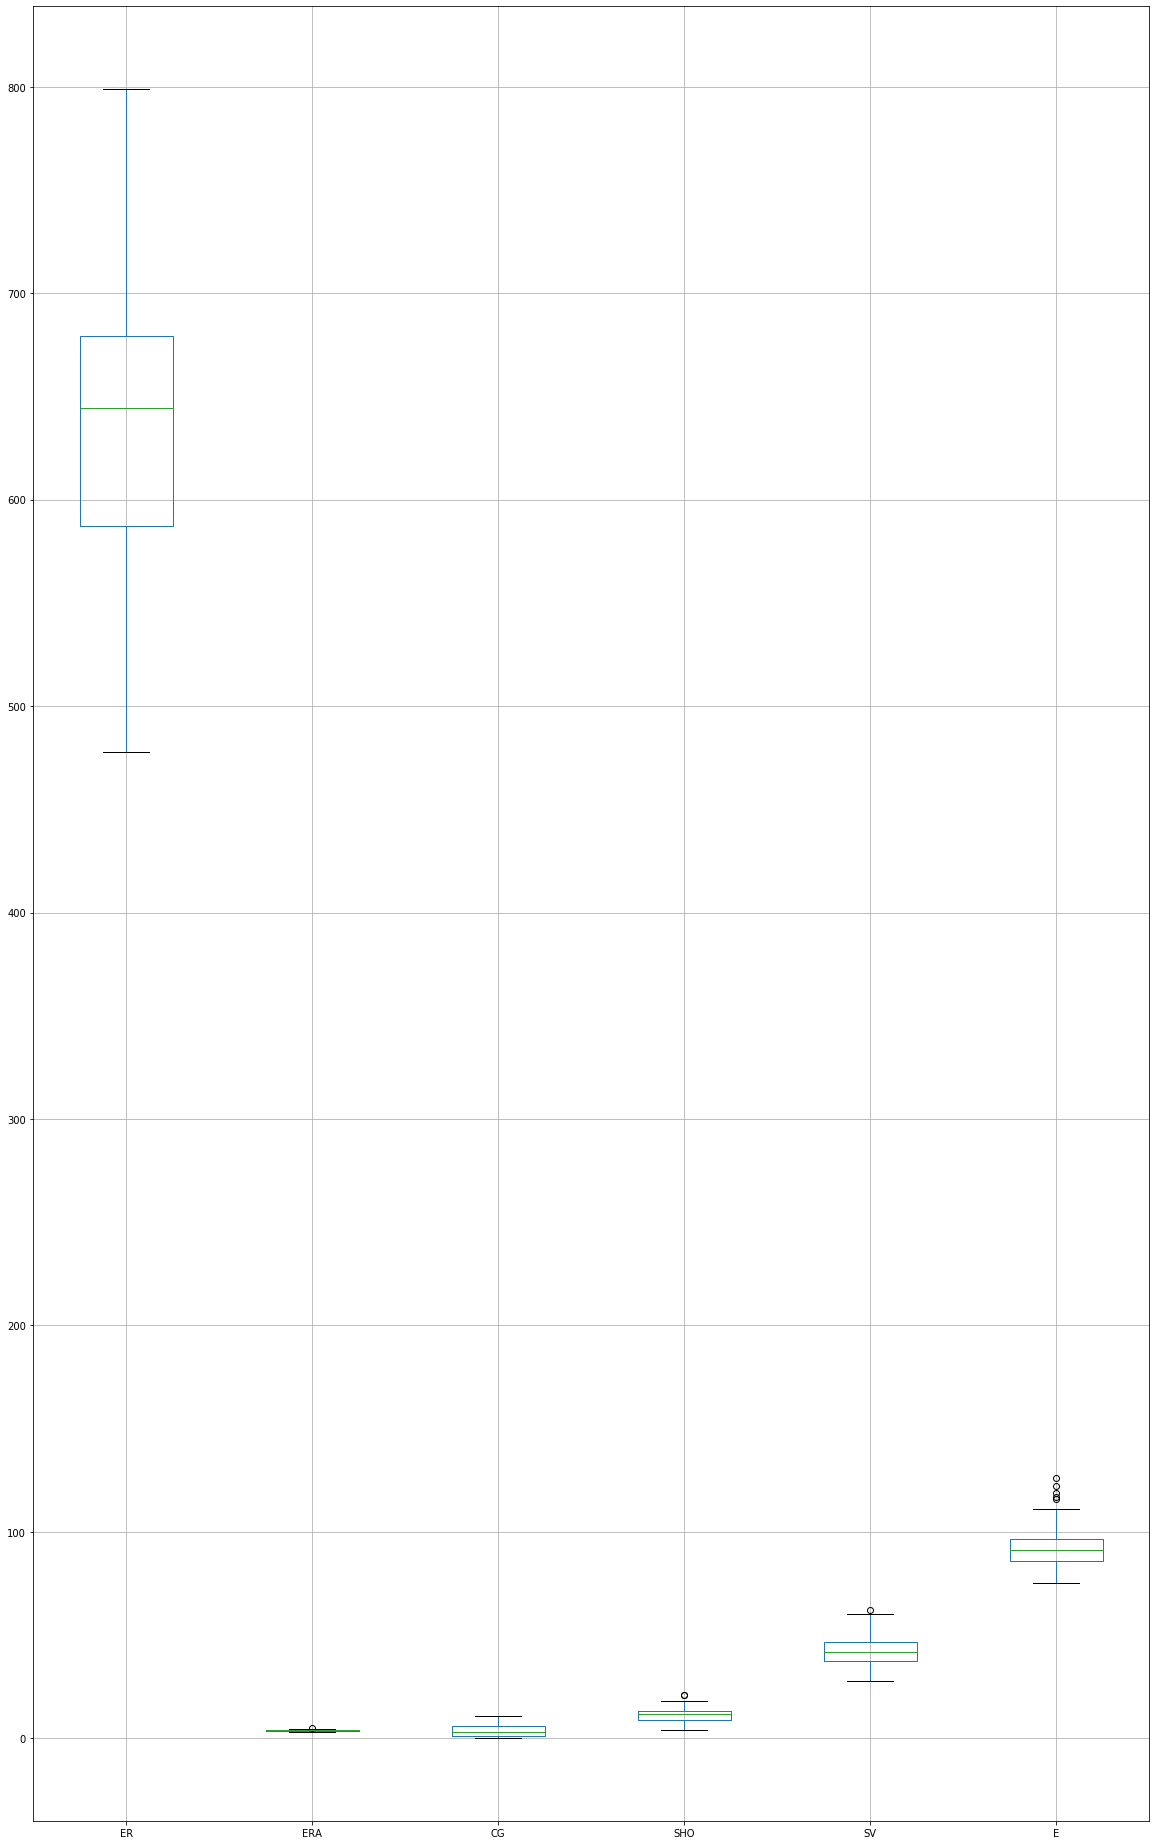

In [53]:
df.iloc[:,11:18].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

As we can see through the above 2 plots that their are no considerable outliers present in the dataset.



In [54]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('W', axis=1)
y=df['W']

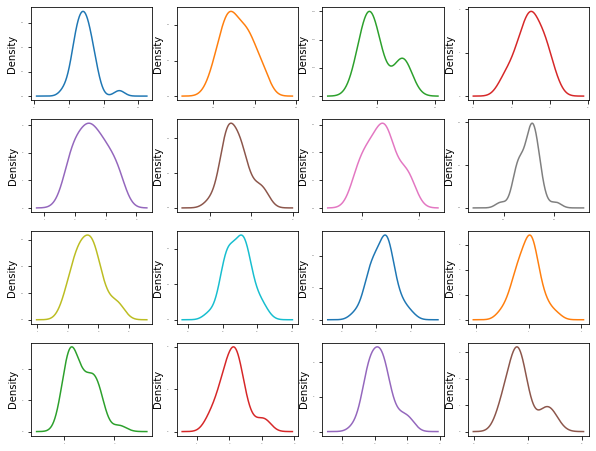

In [55]:
x.plot(kind='density',subplots=True,  layout=(6,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [56]:
#checking the skewness of the data
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

As we see from the above desription that their is some skewness present in the 'Runs' column but it might be possible that some teams had scored more runs and some teams had scored less runs, so we don't have to remove skewness from the runs column.

# Finding Correlation

In [57]:
b_corr =df.corr()

In [58]:
b_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


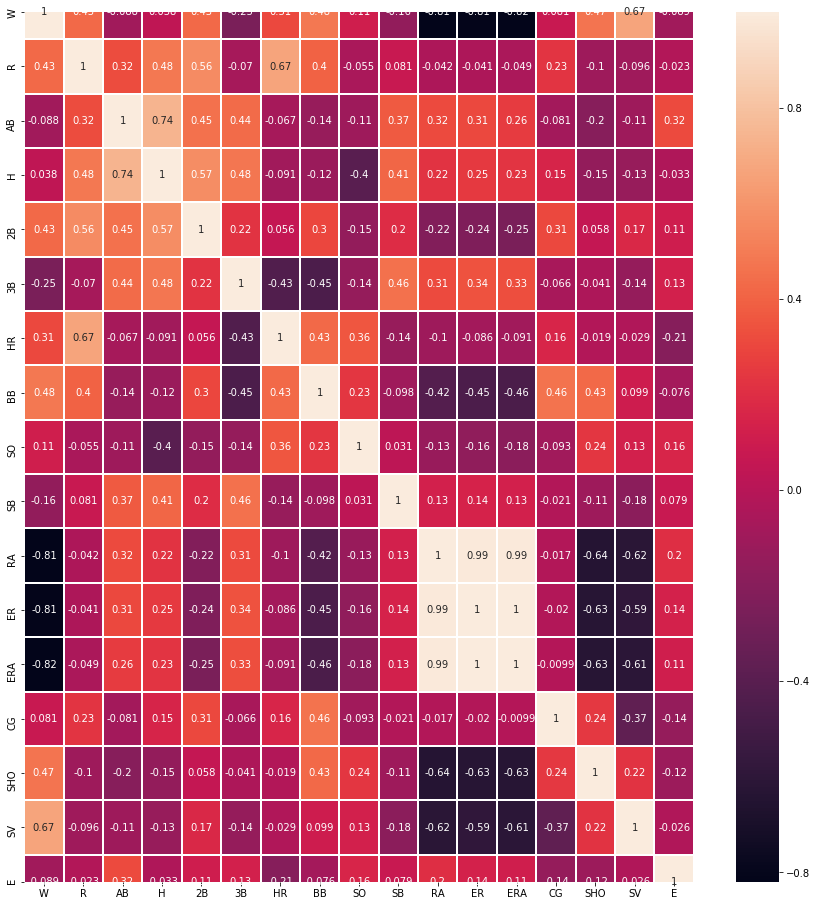

In [59]:
plt.figure(figsize=(15,16))
sns.heatmap(b_corr,annot=True,linewidth=1)
plt.show()

We can observe that there is a very high correlation between features ER,ERA,RA.

ERA is calculated as ER*9/Innings pitched, factors like 'Innings pitched' are not available as columns in the data.

# Visualizing correlation of feature columns with label column.

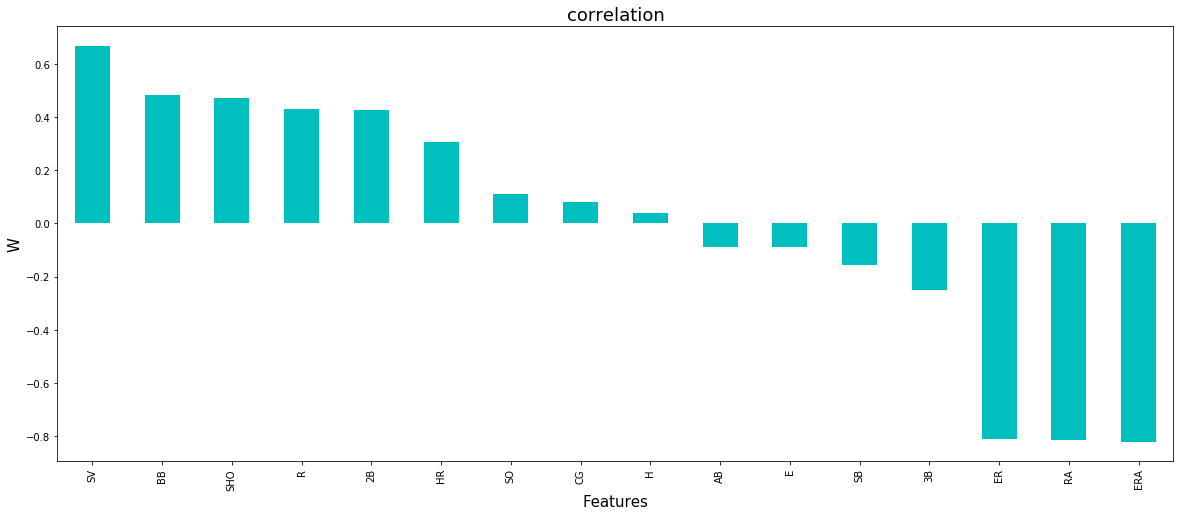

In [60]:
plt.figure(figsize = (20,8))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('W',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

SV has the highest positive correlation with W followed by SHO and BB. While, ER,ERA and RA have the highest negative correlation wiht W. H has the weakest correlation with W.

In [61]:
#checking Statistical sumary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We can see through the above description that the standard deviation are high in 'R', 'AB', 'H', 'BB', 'SO', 'RA', 'ER'. So that means the data is spread too much.

Range is high in these columns

In [62]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [63]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Normalizing Data Distribution using PowerTransformer

In [64]:
from sklearn.preprocessing import PowerTransformer

In [65]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [66]:
skewed = ['E','CG','SV']

In [67]:
df4 = df[skewed].copy()

In [68]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [69]:
(df==0).sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

In [70]:
transformed= powtrans.fit_transform(df4)

In [71]:
type(transformed)

numpy.ndarray

In [72]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [73]:
transformed.skew()

E     0.063909
CG   -0.059785
SV    0.000836
dtype: float64

In [74]:
(transformed==0).sum()

E     0
CG    0
SV    0
dtype: int64

In [75]:
transformed.index = df.index

In [76]:
df[skewed] = transformed[skewed]

In [77]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.059785
SHO    0.565790
SV     0.000836
E      0.063909
dtype: float64

In [78]:
df.shape

(30, 17)

A lot of skewness has been removed.



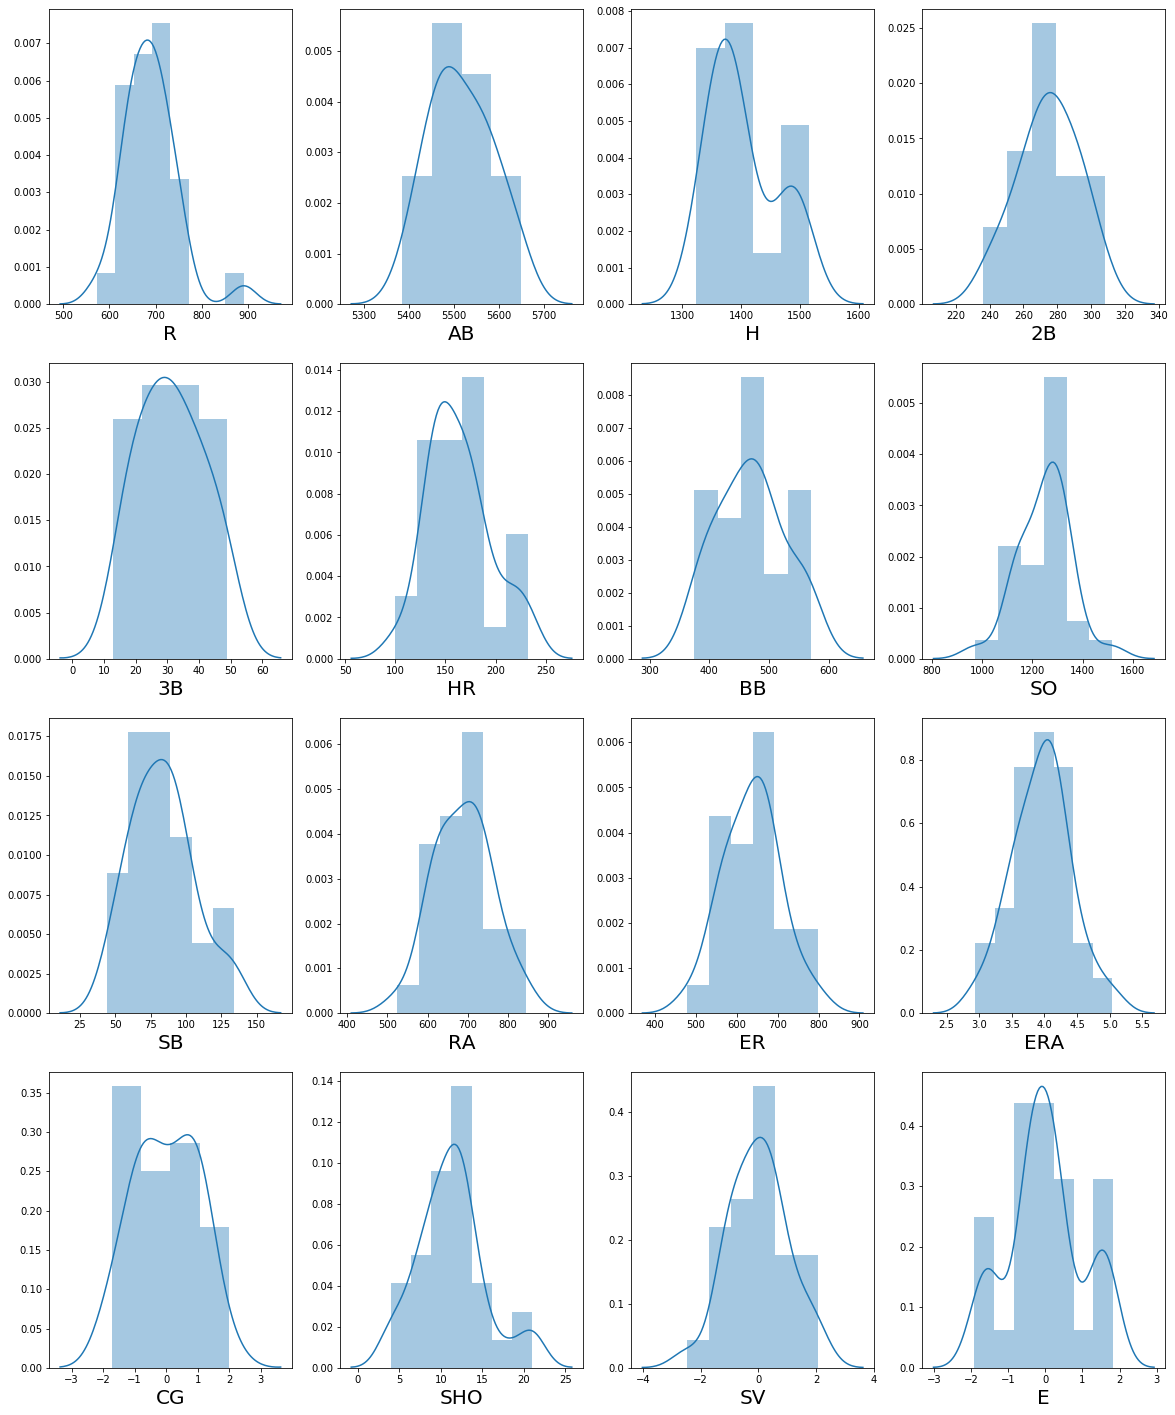

In [79]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns=['W']):
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data Distribution looks much more normalised now.



# Feature Selection

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler= StandardScaler()

In [82]:
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()

In [85]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [86]:
vif

,Features,vif
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


R,ER and ERA have the highest multicollinearity amongst all the features.



# Principle Component Analysis

In [87]:
from sklearn.decomposition import PCA

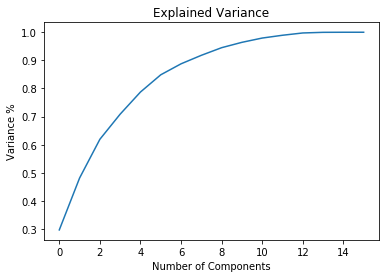

In [88]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

14 components explain around 95% variance in Data



In [89]:
pca = PCA(n_components=14)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(14))

In [90]:
principle_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.867413,2.122345,-2.894358,0.669670,-2.731243,0.147389,0.635840,0.321777,-0.462272,-0.020176,-0.732738,0.145333,0.320717,0.163688
1,0.130337,-0.870952,-0.351691,0.134231,-0.211433,0.468177,-0.904620,0.929330,-0.852782,-0.625750,0.615142,0.210456,0.202009,0.448008
2,-1.311442,1.177871,0.666544,2.976226,0.312964,-0.639481,1.136171,1.596495,0.234307,0.653205,0.387795,0.284388,-0.104070,-0.105921
3,0.765362,-1.377492,-0.051721,0.950416,0.423381,-1.075740,0.063431,-0.105279,0.028011,1.593964,-0.540106,0.415591,-0.381558,0.209748
4,3.323426,1.681766,0.273832,1.260491,0.864381,0.260109,-1.708900,0.463959,0.672309,0.110339,0.065684,-0.237473,-0.169029,-0.257682
5,-0.923627,4.086316,3.319173,0.318585,-1.168070,-0.190317,0.960672,-0.395233,-0.801111,-0.167729,0.314109,-0.605618,-0.004595,0.024952
6,-0.290468,0.738750,2.201384,-1.446595,-1.693805,-0.599754,0.338534,0.008548,0.856549,-0.427661,-0.060139,0.954141,-0.565738,-0.002555
7,-0.593708,-1.961116,1.796415,-1.146524,-1.658562,1.107181,-1.327971,-0.739914,-0.320259,0.534286,0.051121,-0.067460,-0.179533,0.009786
8,-1.324598,-0.735104,-1.534594,-1.140173,-0.529206,0.467598,-0.210044,0.943309,0.293857,-0.171844,-0.675044,-0.235321,0.442357,-0.162970
9,2.062331,2.069248,0.209600,-0.094183,-0.944075,-0.922906,-0.794728,-0.670389,0.536733,-0.138445,0.416838,-0.119349,0.104018,0.021363


# Model Building



In [91]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.9740342087681648
At random state 0, the testing accuracy is:- 0.39888593312783427


At random state 1, the training accuracy is:- 0.9802780428217759
At random state 1, the testing accuracy is:- 0.3146174936334357


At random state 2, the training accuracy is:- 0.9945593908141707
At random state 2, the testing accuracy is:- -2.1905436325157126


At random state 3, the training accuracy is:- 0.9760342041610789
At random state 3, the testing accuracy is:- 0.6078839601545595


At random state 4, the training accuracy is:- 0.9653607276925373
At random state 4, the testing accuracy is:- 0.66948990600316


At random state 5, the training accuracy is:- 0.9542874439438672
At random state 5, the testing accuracy is:- 0.7639635508871775


At random state 6, the training accuracy is:- 0.9548034139459609
At random state 6, the testing accuracy is:- 0.7045610801845371


At random state 7, the training accuracy is:- 0.968634780921581
At random state 7, 

At random state 65, the training accuracy is:- 0.9499093883136953
At random state 65, the testing accuracy is:- 0.8259641259647623


At random state 66, the training accuracy is:- 0.9894825335563613
At random state 66, the testing accuracy is:- 0.5198518583424192


At random state 67, the training accuracy is:- 0.9462666069247796
At random state 67, the testing accuracy is:- 0.8020716341824294


At random state 68, the training accuracy is:- 0.9769746037885536
At random state 68, the testing accuracy is:- -0.15813736408204826


At random state 69, the training accuracy is:- 0.9863733271516846
At random state 69, the testing accuracy is:- 0.7265581779863359


At random state 70, the training accuracy is:- 0.976303113247366
At random state 70, the testing accuracy is:- -2.0012102075292564


At random state 71, the training accuracy is:- 0.9644127760328431
At random state 71, the testing accuracy is:- -0.17280004753270028


At random state 72, the training accuracy is:- 0.965073471354762


At random state 126, the training accuracy is:- 0.98368375954058
At random state 126, the testing accuracy is:- 0.32084223064121875


At random state 127, the training accuracy is:- 0.9859793792565009
At random state 127, the testing accuracy is:- 0.49920823127078906


At random state 128, the training accuracy is:- 0.9967231039834489
At random state 128, the testing accuracy is:- -0.029873903791322265


At random state 129, the training accuracy is:- 0.961729445598874
At random state 129, the testing accuracy is:- 0.6860957424418661


At random state 130, the training accuracy is:- 0.9656151691043476
At random state 130, the testing accuracy is:- 0.1977306301241214


At random state 131, the training accuracy is:- 0.9884331434061264
At random state 131, the testing accuracy is:- 0.24016820303070718


At random state 132, the training accuracy is:- 0.9937879602719772
At random state 132, the testing accuracy is:- 0.6992032182846896


At random state 133, the training accuracy is:- 0.95

At random state 189, the training accuracy is:- 0.9800261906295656
At random state 189, the testing accuracy is:- 0.6829290011542664


At random state 190, the training accuracy is:- 0.9696242960313198
At random state 190, the testing accuracy is:- -0.8567937746753063


At random state 191, the training accuracy is:- 0.9691311004729465
At random state 191, the testing accuracy is:- -0.12141908111566924


At random state 192, the training accuracy is:- 0.9883348954519089
At random state 192, the testing accuracy is:- -0.643658299451046


At random state 193, the training accuracy is:- 0.9571762789586218
At random state 193, the testing accuracy is:- 0.21973696231184814


At random state 194, the training accuracy is:- 0.9920366998057492
At random state 194, the testing accuracy is:- -0.16261730136002228


At random state 195, the training accuracy is:- 0.957927823042104
At random state 195, the testing accuracy is:- 0.43730997892935886


At random state 196, the training accuracy is:- 0

From the above stats we can see that at random state 114, the testing accuracy and the training accuracy is highest.

Now testing the best random state in different columns.

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=114)

In [93]:
from sklearn.kernel_ridge import KernelRidge

In [94]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(),KernelRidge()]

In [95]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2_score of',n,'is')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2_score of LinearRegression() is
0.9172122929401229
10.633621040135326
2.782006211266935


r2_score of SVR() is
-0.12228099971439721
144.15075951887147
9.988103363043805


r2_score of RandomForestRegressor() is
0.4974509515570934
64.54963333333333
7.058888888888887


r2_score of DecisionTreeRegressor() is
-0.035467128027681705
133.0
10.555555555555555


r2_score of KernelRidge() is
0.9035177388691993
12.392610429689507
3.1126420531007977




Now checking the Cross Validation Score to check whether our models are overfitted or underfitted



In [96]:
scrli=cross_val_score(LinearRegression(),x,y,cv=7)
print('cross validation score of linear regression: ',scrli.mean())

cross validation score of linear regression:  0.3890804644289939


In [97]:
scrkr=cross_val_score(KernelRidge(),x,y,cv=7)
print('cross validation score of KrenelRidgeRegressor: ',scrkr.mean())

cross validation score of KrenelRidgeRegressor:  0.5424076284301108


In [98]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=7)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.013530106267764266


In [99]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=7)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  -1.388062380584406


In [100]:
scrsvr=cross_val_score(SVR(),x,y, cv=7)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  -0.44365990018156637


Minimum difference in r2_score and cross validation score is for KernalRidge. So it is our best model

Doing GridSearchCV for getting best parameters

# Hypertuning

In [101]:
#creating parameter list to pass in GridSearchCV
parameters= {'kernel': ['linear','string','callable'],
             'degree': np.arange(0,5),
             'alpha': np.arange(1.0,5.0)}

In [102]:
GCV=GridSearchCV(KernelRidge(),parameters,cv=7)

In [103]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KernelRidge(),
             param_grid={'alpha': array([1., 2., 3., 4.]),
                         'degree': array([0, 1, 2, 3, 4]),
                         'kernel': ['linear', 'string', 'callable']})

In [104]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'alpha': 4.0, 'degree': 0, 'kernel': 'linear'}

In [105]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [106]:
r2_score(GCV_pred,y_test)

0.9201912315175982

# Saving the model

In [107]:
joblib.dump(GCV.best_estimator_,'Baseball.obj')

['Baseball.obj']

# Loading The Model

In [108]:
mod=joblib.load("Baseball.obj")

In [109]:
print(mod.predict(x_test))

[87.537076   79.93552402 80.37491567 83.27380102 95.52552019 99.89876322
 56.59041396 66.3101408  83.22014244]


Case Study:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features which are Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. With these inputs we have to predict the number of wins for a given team.

Predictions:
    
    
    
    

we can see that at random state 114, the testing accuracy and the training accuracy is highest.

The best r2_score we get are from Logistic Regression and kernel Ridge.

After doing Cross Validation. Minimum difference in r2_score and cross validation score is for KernalRidge. So it is our best model.

After doing hyperparameter tuning. we increase the score of our model from 54% to 92%.